In [8]:
%pip install ipywidgets

                                              0.0/138.3 kB ? eta -:--:--
     --------                                30.7/138.3 kB 1.3 MB/s eta 0:00:01
     -------------------                   71.7/138.3 kB 787.7 kB/s eta 0:00:01
     -------------------------------------- 138.3/138.3 kB 1.2 MB/s eta 0:00:00
                                              0.0/2.3 MB ? eta -:--:--
     ---                                      0.2/2.3 MB 5.3 MB/s eta 0:00:01
     -----                                    0.3/2.3 MB 4.1 MB/s eta 0:00:01
     --------                                 0.5/2.3 MB 3.9 MB/s eta 0:00:01
     -------------                            0.8/2.3 MB 4.3 MB/s eta 0:00:01
     -----------------                        1.0/2.3 MB 4.7 MB/s eta 0:00:01
     ----------------------                   1.3/2.3 MB 4.9 MB/s eta 0:00:01
     ---------------------------              1.6/2.3 MB 5.0 MB/s eta 0:00:01
     -------------------------------          1.8/2.3 MB 5.0 MB/s eta 

In [3]:
%pip install matplotlib

                                              0.0/7.5 MB ? eta -:--:--
                                              0.0/7.5 MB 1.3 MB/s eta 0:00:06
                                              0.1/7.5 MB 1.1 MB/s eta 0:00:08
                                              0.2/7.5 MB 1.3 MB/s eta 0:00:06
     -                                        0.4/7.5 MB 2.0 MB/s eta 0:00:04
     --                                       0.5/7.5 MB 2.3 MB/s eta 0:00:04
     ----                                     0.9/7.5 MB 3.1 MB/s eta 0:00:03
     ------                                   1.2/7.5 MB 3.6 MB/s eta 0:00:02
     --------                                 1.5/7.5 MB 4.1 MB/s eta 0:00:02
     ---------                                1.8/7.5 MB 4.3 MB/s eta 0:00:02
     -----------                              2.1/7.5 MB 4.5 MB/s eta 0:00:02
     -------------                            2.5/7.5 MB 4.7 MB/s eta 0:00:02
     --------------                           2.7/7.5 MB 4.8 MB/s eta 0

In [1]:
%pip install implicit

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
# from tqdm import tqdm_notebook
from tqdm.notebook import tqdm
import scipy.sparse as sparse
%matplotlib inline

from implicit.als import AlternatingLeastSquares

In [7]:
!wget http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-360K.tar.gz

--2023-07-07 14:34:30--  http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-360K.tar.gz
Resolving mtg.upf.edu (mtg.upf.edu)... 84.89.139.55
Connecting to mtg.upf.edu (mtg.upf.edu)|84.89.139.55|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569202935 (543M) [application/octet-stream]
Saving to: 'lastfm-dataset-360K.tar.gz'

     0K .......... .......... .......... .......... ..........  0%  146K 63m14s
    50K .......... .......... .......... .......... ..........  0%  204K 54m20s
   100K .......... .......... .......... .......... ..........  0%  393K 44m4s
   150K .......... .......... .......... .......... ..........  0%  399K 38m51s
   200K .......... .......... .......... .......... ..........  0%  258K 38m15s
   250K .......... .......... .......... .......... ..........  0%  442K 35m22s
   300K .......... .......... .......... .......... ..........  0% 1.03M 31m34s
   350K .......... .......... .......... .......... ..........  0%  457K 30m9s
   4

In [11]:
!tar -xzvf lastfm-dataset-360K.tar.gz

x lastfm-dataset-360K/
x lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv
x lastfm-dataset-360K/README.txt
x lastfm-dataset-360K/mbox_sha1sum.py
x lastfm-dataset-360K/usersha1-profile.tsv


In [5]:
raw_data = pd.read_table('C:\\WORK\\RMSL9\\lastfm-dataset-360K\\usersha1-artmbid-artname-plays.tsv', headers=False)

In [6]:
raw_data = raw_data.drop(raw_data.columns[1], axis=1)
raw_data.columns = ['user', 'artist', 'plays']

In [7]:
raw_data.head()

,user,artist,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
1,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
2,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
3,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
4,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691


In [8]:
data = raw_data.dropna()

In [9]:
data.loc[[1,2]]

,user,artist,plays
1,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
2,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717


<Axes: >

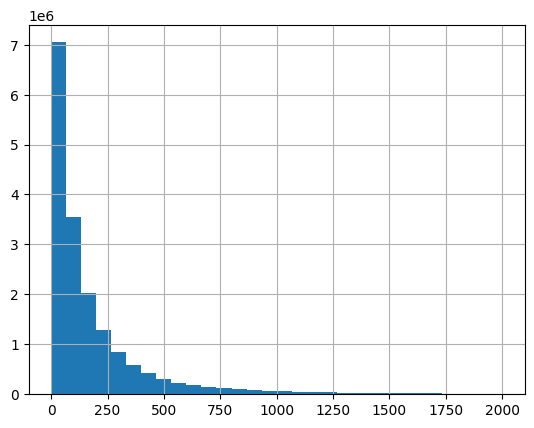

In [10]:
data.iloc[np.where(data.plays < 2000)].plays.hist(bins=30) #plays -кол-во прослушиваний

In [11]:
data = data.loc[data.plays != 0].reset_index(drop=True)

In [12]:
data['user_id'] = data['user'].astype("category").cat.codes # перекодируем в категорию, чтобы быстрее было
data['artist_id'] = data['artist'].astype("category").cat.codes

In [13]:
item_lookup = data[['artist_id', 'artist']].drop_duplicates()
item_lookup['artist_id'] = item_lookup.artist_id.astype(str) # что-то типа справочника

In [14]:
item_lookup.head()

,artist_id,artist
0,90933,die Ärzte
1,185367,melissa etheridge
2,106704,elvenking
3,155241,juliette & the licks
4,220128,red hot chili peppers


In [17]:
artist_id_name = {}

for index, row in tqdm(item_lookup.iterrows()):
    artist_id_name[row.artist_id] = row.artist

0it [00:00, ?it/s]

In [43]:
artist_id_name

{'90933': 'die Ärzte',
 '185367': 'melissa etheridge',
 '106704': 'elvenking',
 '155241': 'juliette & the licks',
 '220128': 'red hot chili peppers',
 '177597': 'magica',
 '252797': 'the black dahlia murder',
 '259856': 'the murmurs',
 '175802': 'lunachicks',
 '278311': 'walls of jericho',
 '169906': 'letzte instanz',
 '126690': 'goldfrapp',
 '137062': 'horrorpops',
 '253488': 'the butchies',
 '144293': 'jack off jill',
 '37515': 'babes in toyland',
 '100639': 'dropkick murphys',
 '19592': 'all:my:faults',
 '167984': 'le tigre',
 '230100': 'schandmaul',
 '103711': 'edguy',
 '184079': 'maximum the hormone',
 '19356': 'all ends',
 '144238': 'jack johnson',
 '106689': 'eluveitie',
 '219078': 'rasputina',
 '172574': 'london after midnight',
 '258212': 'the killers',
 '194518': 'mutyumu',
 '154684': 'judas priest',
 '223386': 'rob zombie',
 '253139': 'the bosshoss',
 '51085': 'blue Öyster cult',
 '228759': 'sandra nasic',
 '151766': 'john mayer',
 '237283': 'sleater-kinney',
 '264743': 'the

In [ ]:
data = data.drop(['user', 'artist'], axis=1)

In [20]:
data.head()

,plays,user_id,artist_id
0,1099,0,90933
1,897,0,185367
2,717,0,106704
3,706,0,155241
4,691,0,220128


In [21]:
data = data.loc[data.plays !=0]

In [22]:
users = list(np.sort(data.user_id.unique()))
artists = list(np.sort(data.artist_id.unique()))
plays = list(data.plays)

In [23]:
len(users), len(artists), len(plays) # очень большая таблица, понядобятся sparce matrix(Там хранятся только ненулевые элементы)

(358868, 292363, 17535449)

In [24]:
rows = data.user_id.astype(int) # В sparce матрицу передаем пользователей как строки, артистов как столбцы, а на пересечении будет plays - к-во просмотров
cols = data.artist_id.astype(int)

In [25]:
data_sparse = sparse.csr_matrix((plays, (rows, cols)), shape=(len(users),len(artists)))

In [26]:
model = AlternatingLeastSquares(factors=50)
model.fit(data_sparse)

  0%|          | 0/15 [00:00<?, ?it/s]

In [27]:
itemid = 107209
related = model.similar_items(107209) # Находим композициции близкие по векторам признаков
related_users = model.similar_users(1111) # Находит близких по предпочтениям юзеров

In [34]:
userid=1111
user_items = data_sparse[userid]
recommendations = model.recommend([userid], user_items)

In [35]:
recommendations

(array([[ 59099, 270220, 128172, 235438,  50265, 171898, 173528, 158773,
         194621, 243416]]),
 array([[1.2210021, 1.126298 , 1.1244067, 1.0897257, 1.0849664, 1.0826632,
         1.0770907, 1.0744864, 1.0699452, 1.0638847]], dtype=float32))

In [45]:
for r in recommendations[0][0]:
    print(artist_id_name[str(r)])

bush
travis
green day
silverchair
blink-182
live
los hermanos
keane
my chemical romance
stereophonics


In [36]:
', '.join([artist_id_name[str(art)] for art in data[data['user_id']==userid]['artist_id']])# непонятно, зачем тогда мы справочник артистов делали, если не пользуемс\
    

'hateen, ihab tawfik, tarkan, foo fighters, ride, audioslave, social distortion, wael kfoury, pin ups, the draft, hot water music, mazikana_ehab_tawfik, snow patrol, jimmy eat world, damien rice, samira said, ehab tawfiq, dido, panic! at the disco, inspiral carpets, saves the day, nickelback, alkaline trio, maná, amy winehouse, baby bash, ramones, oasis, nada surf, fall out boy, fresno, garage fuzz, ashanti, johnny cash, the ataris, the beatles, goo goo dolls, the perishers, 3 doors down, mustafa amar, nxzero, new order, relient k, rbd, semisonic, street bulldogs'

In [47]:
[(k,v) for k,v in artist_id_name.items() if 'the beatles' in v]

[('252494', 'the beatles'),
 ('252498', 'the beatles - one - cant buy me love'),
 ('4111', '52. the beatles'),
 ('1048',
  '0blo=0\t30\n1072c26dee2510f81cf0985bbcac51cd6037372f\t927dcbc3-9c46-4833-8173-b76e785a4b75\tДельфин\t29\n1072c26dee2510f81cf0985bbcac51cd6037372f\t01e10b31-ae0f-49a6-b4f4-5c3dcff9788a\tНочные Снайперы\t29\n1072c26dee2510f81cf0985bbcac51cd6037372f\t4f7ba8a3-35c2-4225-a38b-bf3bc7294cf6\tАдриан и Александр\t26\n1072c26dee2510f81cf0985bbcac51cd6037372f\t990c9ba3-a793-4d27-8167-1d9b96c6b1d7\tИгорь Вдовин\t26\n1072c26dee2510f81cf0985bbcac51cd6037372f\tdfe9a7c4-8cf2-47f4-9dcb-d233c2b86ec3\tamy winehouse\t24\n1072c26dee2510f81cf0985bbcac51cd6037372f\t66cc244d-6f96-4668-a6e9-0f9cd5acc940\tgotan project\t23\n1072c26dee2510f81cf0985bbcac51cd6037372f\tc4b87e45-c07a-460f-9c58-8d15328e2964\tsophie ellis-bextor\t22\n1072c26dee2510f81cf0985bbcac51cd6037372f\t92569dea-79aa-40f3-93ca-9642b6fb75ed\tМультfильмы\t22\n1072c26dee2510f81cf0985bbcac51cd6037372f\tf91b9b28-25b7-4064-81d1-f4

In [27]:
itemid = 252494
related = model.similar_items(itemid)

In [28]:
artist_id_name[str(itemid)]

'the beatles'

In [29]:
for a in related[0]:
    print(artist_id_name[str(a)])

the beatles
pink floyd
radiohead
coldplay
muse
red hot chili peppers
nirvana
the cure
the smashing pumpkins
led zeppelin
